<center>
    <h1>Boat Sales Analysis</h1>
<h3>Case Study Project - Boat Sales</h3>
</center>


## Table of Contents
- Introduction 
    - Background & Objectives
    - Customer Question
    - Dataset 
- Required Libraries
- Load Data
- Data Wrangling
    - Discovery
    - Structuring
    - Cleaning
- Exploratory Data Analysis
- Conclusions

## Introduction


#### Company Background
> Nearly New Nautical is a website that allows users to advertise their used boats for sale. The
marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed
to help sellers to get more views of their boat, as well as stay on top of market trends. The
Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75%
this year.


#### Customer Question
 They would like you to tell them:
- Is it the most expensive boats that get the most views?
- Are there common features among the most viewed boats?


#### Dataset
<table >
  <tr>
    <th>Column Name </th>
    <th>Details</th>
  </tr>
  <tr>
    <td>Price</td>
    <td>Character, boat price listed in different currencies (e.g.EUR, Â£, CHF etc.) on the website</td>
  </tr>
  <tr>
    <td>Boat Type</td>
    <td>Character, type of the boat</td>
  </tr>
  <tr>
    <td>Manufacturer</td>
    <td>Character, manufacturer of the boat</td>
  </tr>
  <tr>
    <td>Type</td>
    <td>Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc.)</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Built Numeric, year of the boat built</td>
  </tr>
  <tr>
    <td>Length</td>
    <td>Numeric, length in meter of the boat</td>
  </tr>
      <tr>
    <td>Width</td>
    <td>Numeric, width in meter of the boat</td>
  </tr>
      <tr>
    <td>Material</td>
    <td>Character, material of the boat (e.g. GRP, PVC, etc.)</td>
  </tr>
          <tr>
    <td>Location</td>
    <td>Character, location of the boat is listed</td>
  </tr>
          <tr>
    <td>Number of views last 7 days</td>
    <td>Numeric, number of the views of the list last 7 days</td>
  </tr>
</table>

## Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.rcParams.update(
    {"font.size": 14, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False,"axes.spines.top": False, "axes.spines.bottom": False,
        "xtick.top": False,
        "xtick.bottom": False,
        "ytick.right": False,
        "ytick.left": False,
    }
)

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Loding the dataset with pandas
df = pd.read_csv(r'/kaggle/input/boat-sales/boat_data.csv')

## Data Wrangling

## Discovery

In [3]:
# Display sample from data to Discover it 
display(df.sample(5))

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
7833,EUR 52500,Center console boat,Jeanneau power boats,"Used boat,Unleaded",2017,7.19,2.54,PVC,Belgium Â» Belgique,114
8767,DKK 235000,Bowrider,Campion power boats,new boat from stock,2019,5.00,2.00,NaN,Denmark Â» Svendborg,121
7010,EUR 75000,Cabin Boat,Cranchi power boats,"Used boat,Unleaded",1999,10.35,2.49,GRP,"Italy Â» Lombardy, Como",142
9016,DKK 195000,Working Boat,Pioner power boats,new boat from stock,2020,5.00,2.00,NaN,Denmark Â» Svendborg,99
3463,EUR 1995000,Motor Yacht,Mangusta power boats,"Used boat,Diesel",2002,33.48,7.10,GRP,France Â» CÃ´te d'Azur Â» CÃ´te d'Azur,252


In [4]:
shape=df.shape
print('Rows : ',shape[0])
print('Columns : ',shape[1])

Rows :  9888
Columns :  10


In [5]:
# Display information about data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


- Data nulls exist.
- non suitable Data Type

## Structuring

In [6]:
#Split Price to 'currency','Price'
df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [7]:
df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [8]:
def eurprice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.02
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)

In [9]:
#Split Location to 'Country.abs,'City','Other'
df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

In [10]:
df_Structuring = df.drop(['Location','currency','Price','Other'],axis=1)
df_Structuring.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


## Cleaning

In [11]:
df_Structuring.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                            943
dtype: int64

In [12]:
df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)
df_Structuring = df_Structuring.drop(['Boat Type1'],axis=1)


In [13]:
# fill Null in "Type"
df_Structuring['Type'].fillna(df_Structuring['Type'].value_counts().idxmax(),inplace=True)

Text(0.5, 1.0, 'Width Distribution')

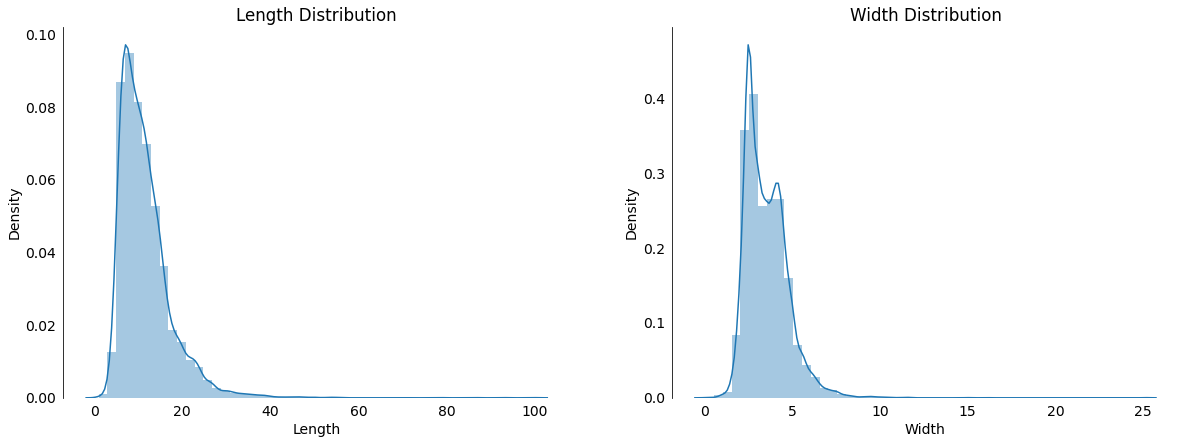

In [14]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_Structuring.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_Structuring.Width)
ax2.set_title("Width Distribution")

In [15]:
df_Structuring['Width'].fillna(df_Structuring['Width'].median(),inplace=True)
df_Structuring['Length'].fillna(df_Structuring['Length'].median(),inplace=True)

In [16]:
# fill Null in "Material"
df_Structuring['Material'].fillna(df_Structuring['Material'].value_counts().idxmax(),inplace=True)

In [17]:
df_Structuring.duplicated().sum()


0

In [18]:
df_Cleaning = df_Structuring.dropna(subset=['Manufacturer','Country'])

In [19]:
df_Structuring['Manufacturer'].fillna('None',inplace=True)
df_Structuring['Country'].fillna('None',inplace=True)
df_Structuring['City'].fillna('None',inplace=True)
df_Structuring.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [20]:
df_Cleaning['City'].fillna('None',inplace=True)
df_Cleaning.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [21]:
print('Befor Clean :' ,df_Structuring.shape)
print('After Clean :' ,df_Cleaning.shape)

Befor Clean : (9888, 11)
After Clean : (8521, 11)


In [22]:
df_Cleaning.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [23]:
df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)

## Exploratory Data Analysis

### May get more number of views depending on the type of boat?

,Boat Type,Number of views last 7 days
19,Cabin Boat,250.885077
20,House Boat,260.296296
21,Classic,288.800000
22,Water ski,316.777778
23,Wakeboard/Wakesurf,373.450000


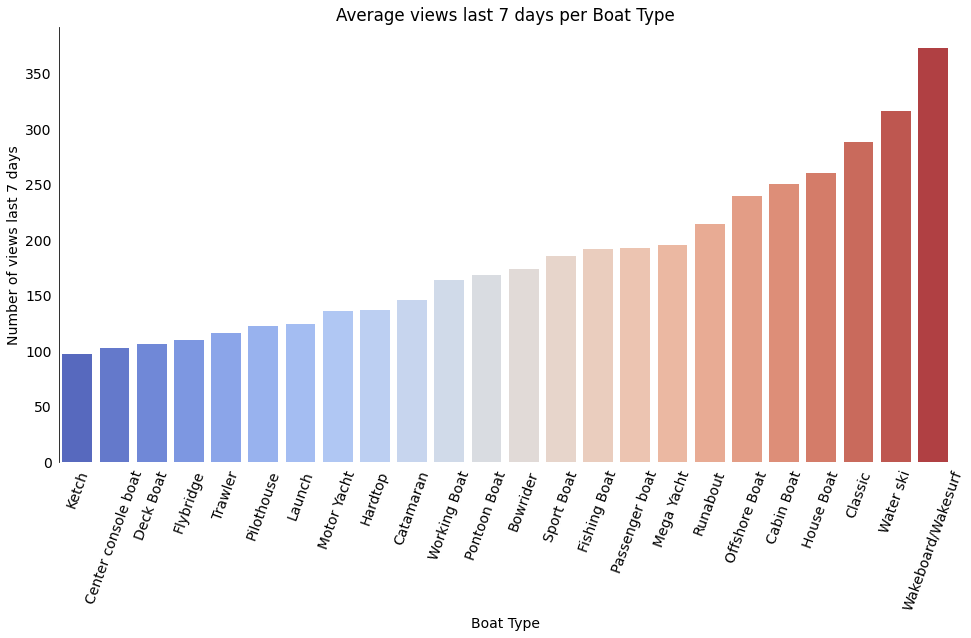

In [24]:
fig = plt.figure(figsize=(16,8) )
Boat_Type_View= df_Cleaning.groupby('Boat Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Boat Type', y='Number of views last 7 days', data=Boat_Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Boat Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
display(Boat_Type_View[-5:])

- The  Average View increase when boat type is Wakeboard/Wakesurf , Water ski , Classic, House Boat and Cabin Boat have the highest average views then other 
- the highest average views  is Wakeboard/Wakesurf
> People prefer fun-filled boats and family gatherings (good point)

### How essential is the type of boat engine and whether the boat is (Condition) used or new  in attracting more  views?

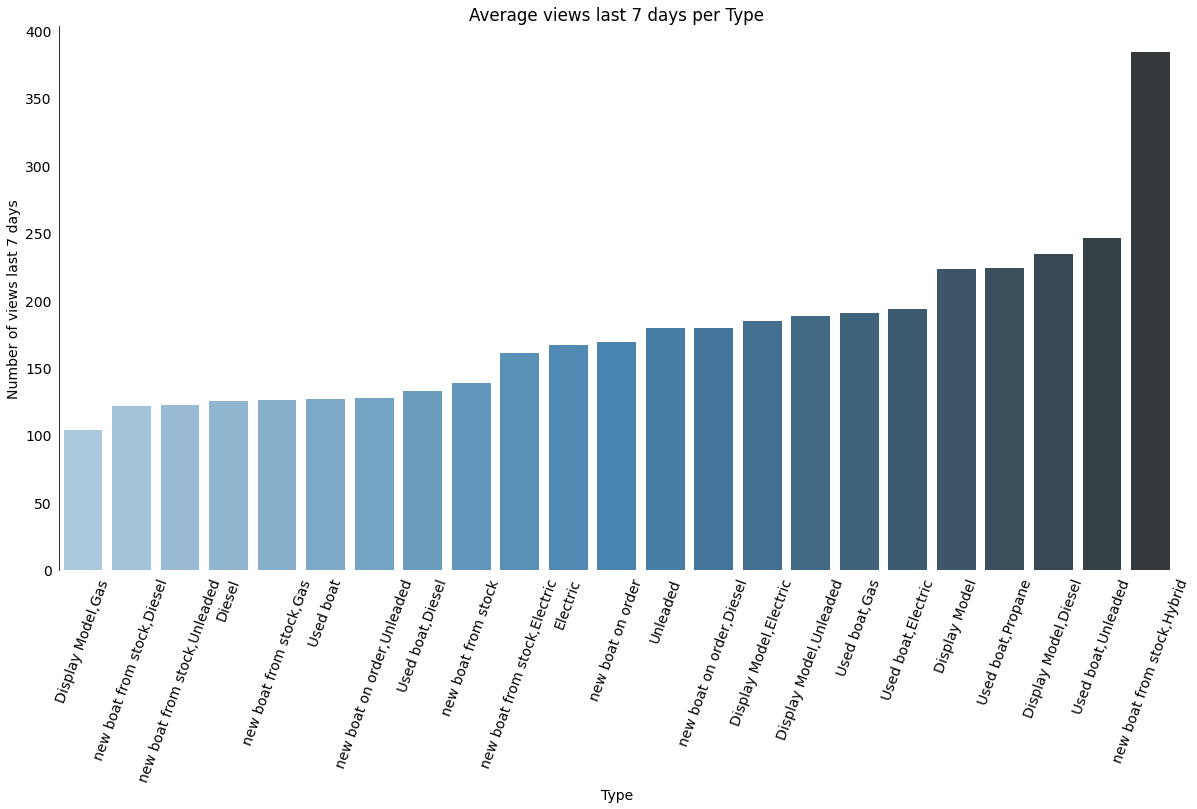

In [25]:
fig = plt.figure(figsize=(20,10) )
Type_View= df_Cleaning.groupby('Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Type', y='Number of views last 7 days', data=Type_View,
                 palette="Blues_d")
plt.title("Average views last 7 days per Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

### Engine Type

Text(0.5, 1.0, 'Average views last 7 days per Engine Type')

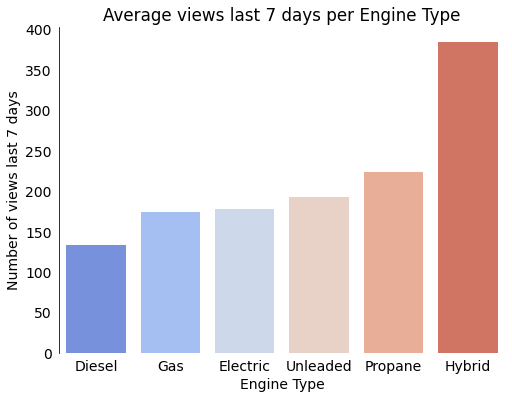

In [26]:
## Create Engine Type Column
df_Cleaning['Engine Type'] = df_Cleaning['Type'].str.split(pat = ',', expand = True)[1]

## Convert None to nan
df_Cleaning['Engine Type'] = df_Cleaning['Engine Type'].replace('None', np.nan)

fig = plt.figure(figsize=(8,6) )
Type_View= df_Cleaning.groupby('Engine Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Engine Type', y='Number of views last 7 days', data=Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Engine Type")


### Condition

Text(0.5, 1.0, 'Average views last 7 days per Condition')

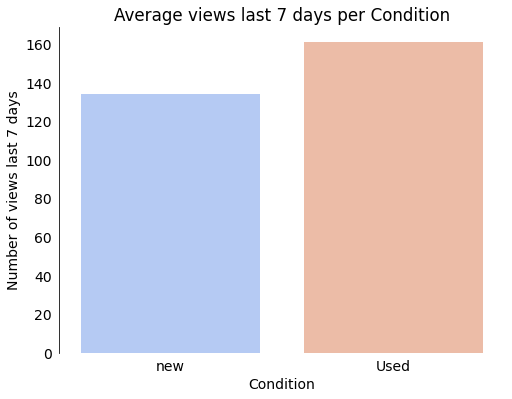

In [27]:

df_Cleaning['Condition'] = df_Cleaning['Type'].str.split(pat = ' ', expand = True)[0]

df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Unleaded':np.nan, 0:np.nan})
df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Diesel':np.nan, 0:np.nan})
df_Cleaning['Condition'] = df_Cleaning['Condition'].replace({'Electric':np.nan, 0:np.nan})

df_Cleaning.loc[df_Cleaning['Condition'] == 'Display', 'Condition'] = 'new'



fig = plt.figure(figsize=(8,6) )
Condition= df_Cleaning.groupby('Condition')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Condition', y='Number of views last 7 days', data=Condition,
                 palette="coolwarm")
plt.title("Average views last 7 days per Condition")

- the highest average views when Engine Type is hybrid.
- Average view between used and new boat are not too far apar.

> Later we will see if this varies from country to other

### Material

Text(0.5, 1.0, 'Average views last 7 days per Material')

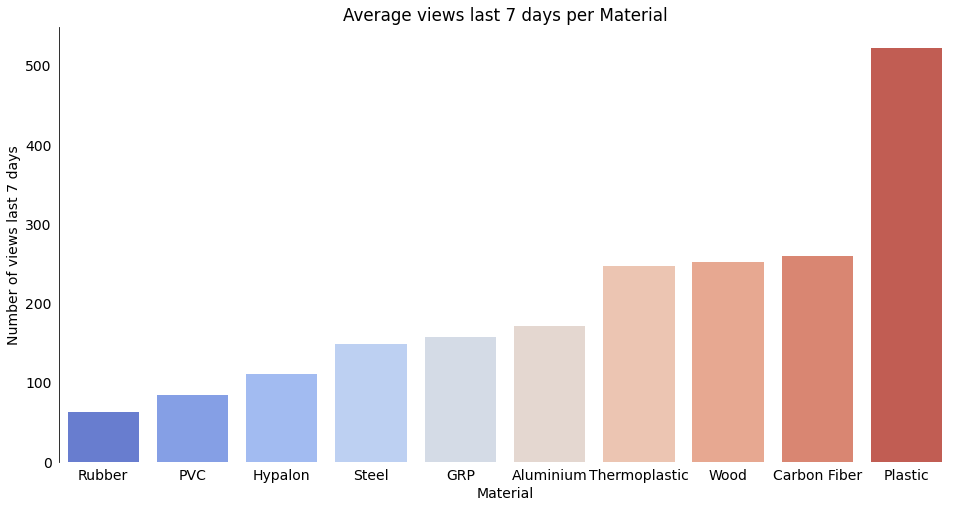

In [28]:
fig = plt.figure(figsize=(16,8) )
Material_View= df_Cleaning.groupby('Material')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)


sns.barplot(x='Material', y='Number of views last 7 days', data=Material_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Material")

> The highest average views occur when the material is plastic, which is to be anticipated given that the majority of recreational boats are made of plastic.

### The average difference between old and new boats does not too far apart. We shall examine if this differs per country.

[Text(0, 0, 'Germany '),
 Text(1, 0, 'Italy '),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Switzerland '),
 Text(4, 0, 'France '),
 Text(5, 0, 'Spain '),
 Text(6, 0, 'Croatia (Hrvatska) '),
 Text(7, 0, 'Netherlands '),
 Text(8, 0, 'Croatia (Hrvatska)'),
 Text(9, 0, 'United Kingdom ')]

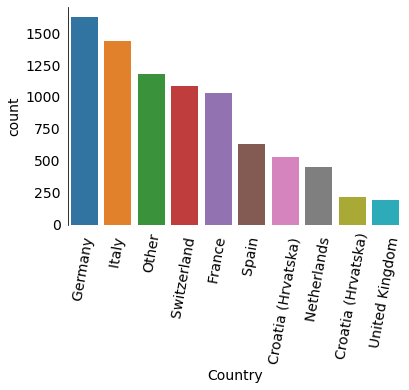

In [29]:
top10_country = df_Cleaning.Country.value_counts().iloc[:10].index

df_Cleaning.loc[~df_Cleaning['Country'].isin(top10_country),'Country']='Other'

ax = sns.countplot(x = 'Country', data = df_Cleaning, order = df_Cleaning.Country.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)

In [30]:
df_Cleaning.Country.value_counts()[:10]
df_Cleaning.Country=df_Cleaning.Country.str.replace(' ','')
df_Cleaning.Country.value_counts()[:10]

Germany              1622
Italy                1434
Other                1180
Switzerland          1085
France               1031
Croatia(Hrvatska)     747
Spain                 629
Netherlands           450
UnitedKingdom         195
Denmark               148
Name: Country, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per Country')

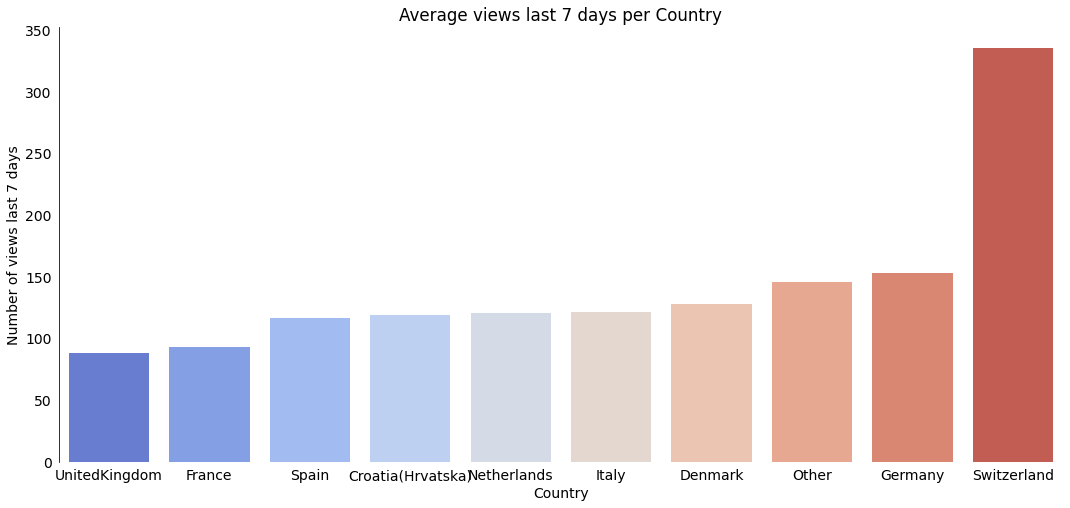

In [31]:
fig = plt.figure(figsize=(18,8) )
Country_View= df_Cleaning.groupby('Country')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Country', y='Number of views last 7 days', data=Country_View[-10:],
                 palette="coolwarm")
plt.title("Average views last 7 days per Country")


### Number of views per Country&Condition 

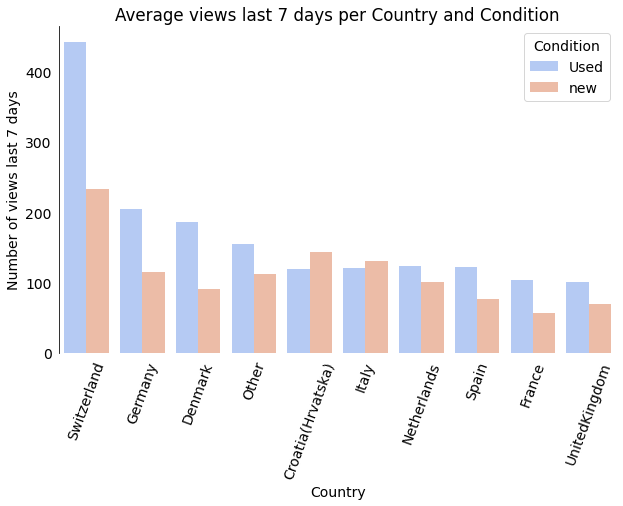

In [32]:
fig = plt.figure(figsize=(10,6) )
Country_View= df_Cleaning.groupby(['Country','Condition'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Condition', data=Country_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Country and Condition")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

### Number of views per Country&Boat Type 

In [33]:
Country_View= df_Cleaning.groupby(['Country','Boat Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Country','Number of views last 7 days'],ascending=False)
Country_ViewNew=Country_View[Country_View['Country']=='Null']

for e in Country_View['Country'].unique() : 
    Country_ViewNew=Country_ViewNew.append(Country_View[Country_View['Country']==e].head(2))

House Boat            3
Mega Yacht            3
Wakeboard/Wakesurf    3
Classic               3
Offshore Boat         2
Passenger boat        1
Water ski             1
Bowrider              1
Hardtop               1
Trawler               1
Cabin Boat            1
Name: Boat Type, dtype: int64

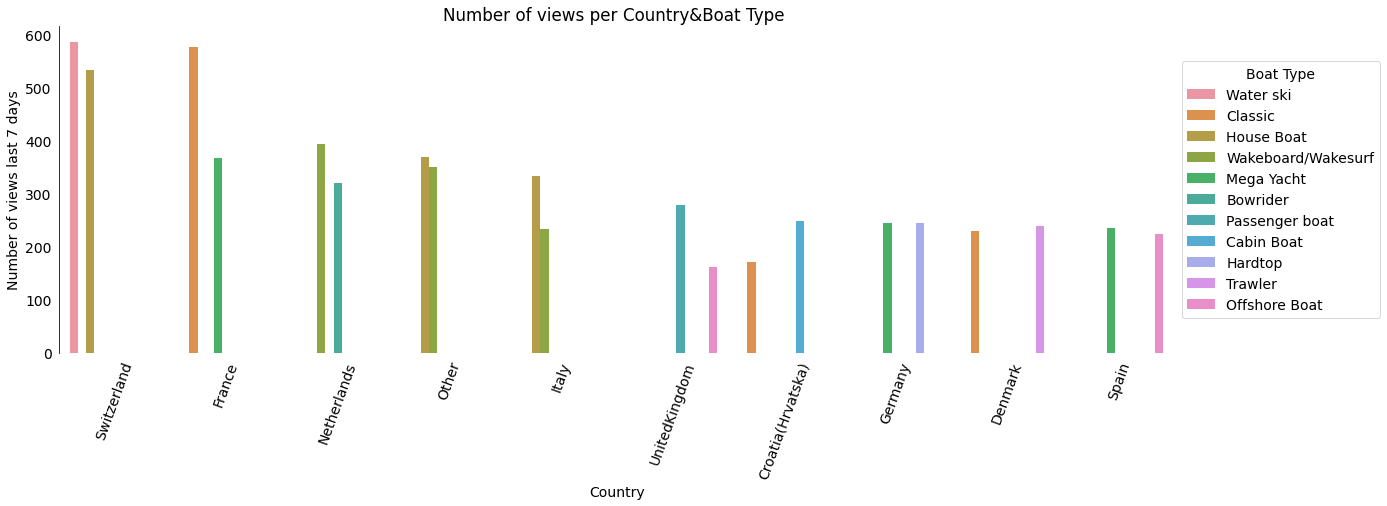

In [34]:
display(Country_ViewNew['Boat Type'].value_counts())
fig = plt.figure(figsize=(20,6) )

sns.barplot(x='Country', y='Number of views last 7 days',hue='Boat Type', data=Country_ViewNew.sort_values(by=['Number of views last 7 days'],ascending=False),
                ci=False)
plt.title("Number of views per Country&Boat Type ")
plt.xticks(rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')


- Each country favours different types of boats, although many of these countries agree on the following: House Boat, Mega Yacht, Wakeboard/Wakesurf, Classic, Offshore Boat.
- in Croatia and Italy , where the demand for the new boats more then the used boats.

### Number of views per Country&Engine Type 

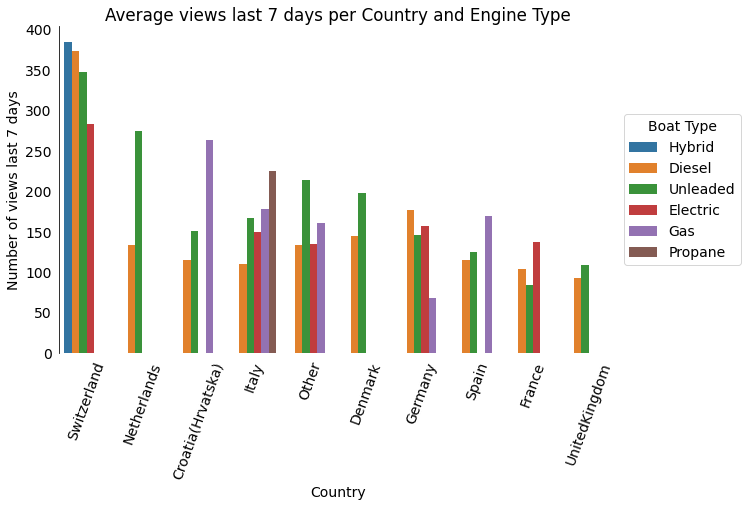

In [35]:
fig = plt.figure(figsize=(10,6) )
Country_View= df_Cleaning.groupby(['Country','Engine Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Engine Type', data=Country_View)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')


- Most of the countries prefer Unleaded engine and Diesel more. 
#### But the main demand varies between countries as follows:
- Switzerland has demand on Hybird.
- Coratia and Spain has demand on gas.
- Italy has demand on propane.
- France has demand on Electric.





### Number of views per Country&Material 

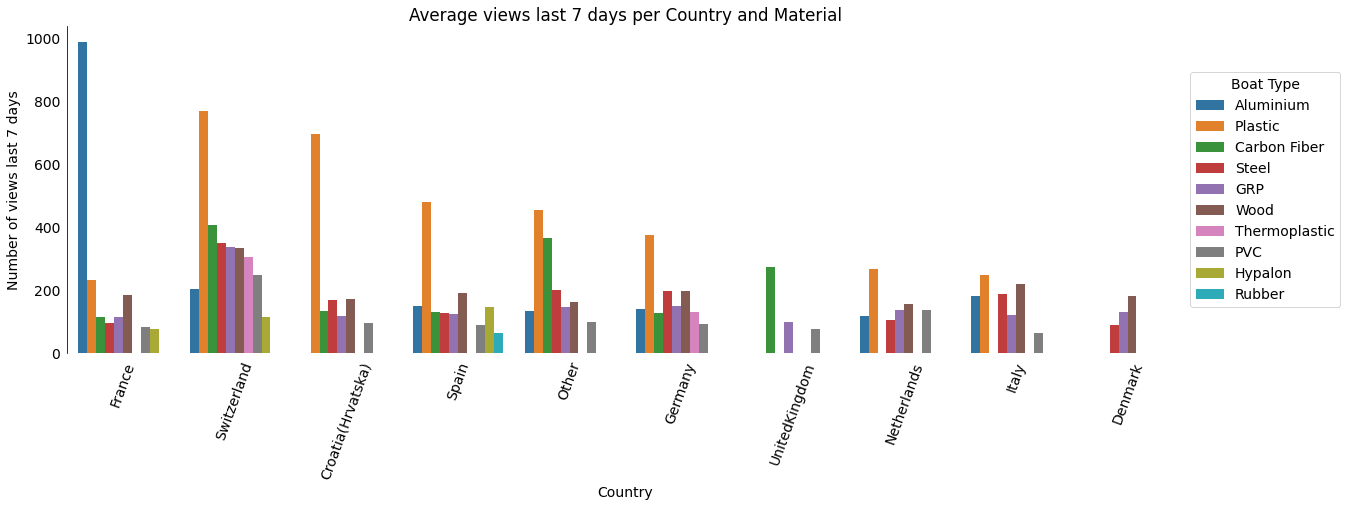

In [36]:
fig = plt.figure(figsize=(20,6) )
Country_View= df_Cleaning.groupby(['Country','Material'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Material', data=Country_View)
plt.title("Average views last 7 days per Country and Material")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')


- the Country has highest average views is Switzerland.
- Average view between the used and the new boat are not too far apar.
- in Switzerland and Germany, where the demand for the used boats are rocketing.
- in Croatia and Italy , where the demand for the new boats more then the used boats.
- All of the countries prefer Boat Type is Plastic Except for France has demand on Aluminium. 


In [37]:
df_Cleaning.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,Engine Type,Condition
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,226,3403.74,Switzerland,Lake Geneva,None,new
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt,None,new
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.40,Switzerland,Lake of Zurich,None,new
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,64,3367.00,Denmark,Svendborg,None,new
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,None,new


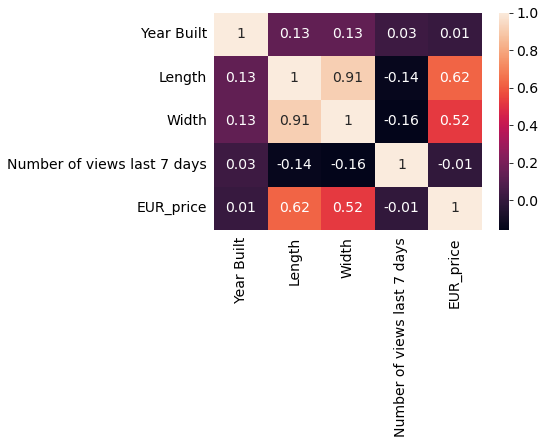

In [38]:
corr = df_Cleaning.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

### Number of views per Year Built

Text(0.5, 1.0, 'Year Built Distribution')

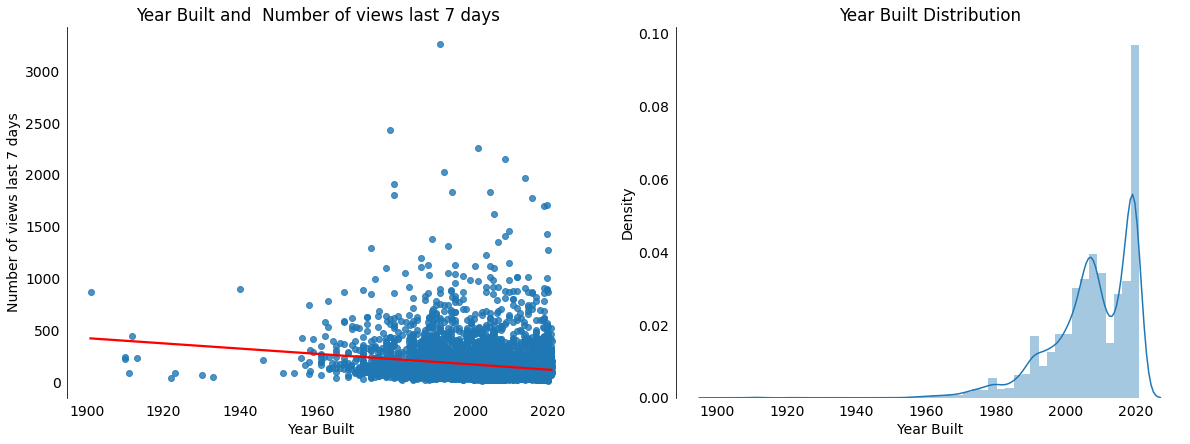

In [39]:
df_CleaningTest=df_Cleaning[df_Cleaning['Year Built']>0]

fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Year Built', y='Number of views last 7 days', data=df_CleaningTest, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Year Built and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.distplot(df_CleaningTest['Year Built'])
ax2.set_title("Year Built Distribution")

In [40]:
display(df_Cleaning['Year Built'].quantile([0.25, 0.50, 0.75]))
df_Cleaning['Year Built'].max()

0.25    1999.0
0.50    2008.0
0.75    2018.0
Name: Year Built, dtype: float64

2021

In [41]:
df_Cleaning['age_group']  = pd.cut(df_Cleaning['Year Built'], bins = [0,2000,2018, 2022], labels = ['Very Old (built before 2000)', 'Old (built between 2000-2017)','Modern (built after 2018)'])
df_Cleaning['age_group'].value_counts()

Old (built between 2000-2017)    4254
Very Old (built before 2000)     1901
Modern (built after 2018)        1867
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per age_group')

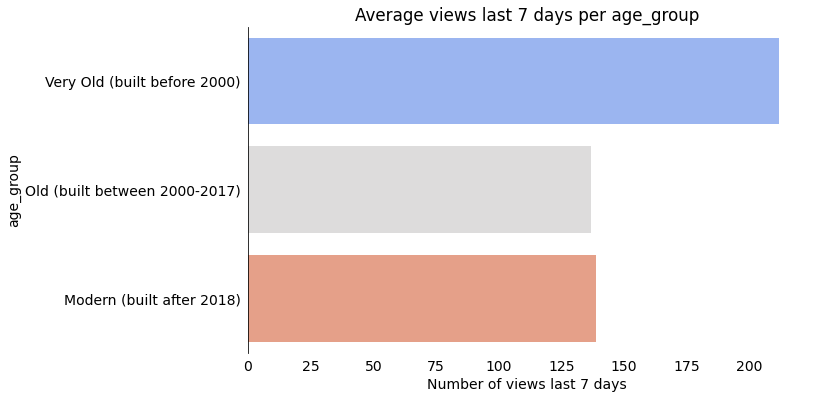

In [42]:
fig = plt.figure(figsize=(10,6) )
age_group= df_Cleaning.groupby('age_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='age_group', x='Number of views last 7 days', data=age_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per age_group")


- Boats that are Very Old (built before 2000) have highest average views.

### Number of views last 7 days per Price  

Text(0.5, 1.0, 'EUR_price Distribution')

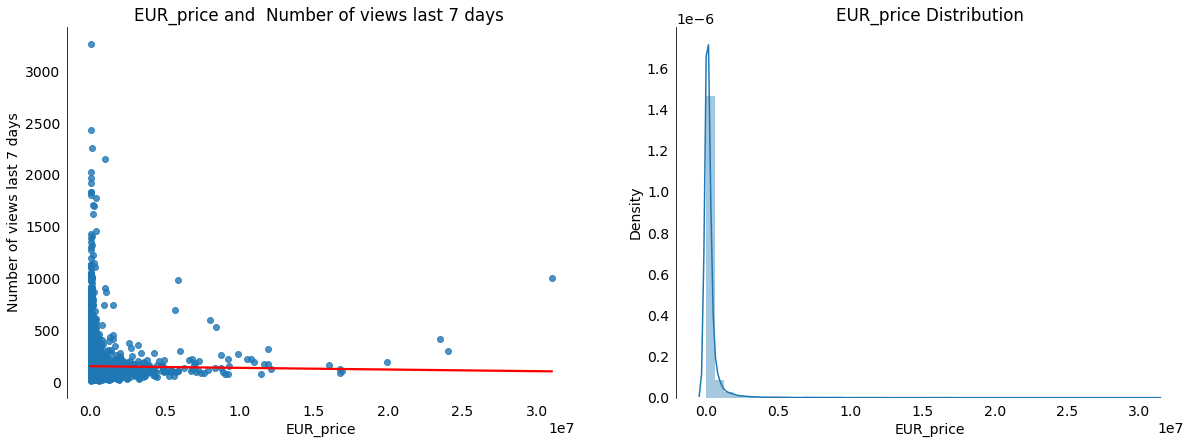

In [43]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='EUR_price', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("EUR_price and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.distplot(df_Cleaning['EUR_price'])
ax2.set_title("EUR_price Distribution")

In [44]:
display(df_Cleaning['EUR_price'].quantile([0.25, 0.50, 0.75]))
df_Cleaning['EUR_price'].max()

0.25     44290.0
0.50     95000.0
0.75    250000.0
Name: EUR_price, dtype: float64

31000000.0

In [45]:
df_Cleaning['Price_groub']= pd.cut(df_Cleaning['EUR_price'], bins = [0,44290.0,95000.0,250000.0], labels = ['Cheap (less than 44290)', 'Medium (44290-250000)','Expensive (more than 250000)'])
df_Cleaning['Price_groub'].value_counts()


Medium (44290-250000)           2171
Cheap (less than 44290)         2132
Expensive (more than 250000)    2110
Name: Price_groub, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per Views Price_groub')

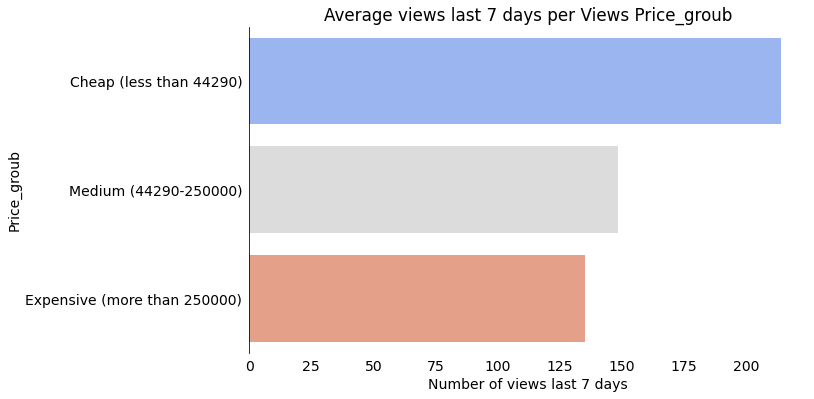

In [46]:
fig = plt.figure(figsize=(10,6) )
Price_groub= df_Cleaning.groupby('Price_groub')['Number of views last 7 days'].mean().reset_index(drop=False)

sns.barplot(y='Price_groub', x='Number of views last 7 days', data=Price_groub,
                 palette="coolwarm")
plt.title("Average views last 7 days per Views Price_groub")

- Boats that are Cheap (less than 44290) have highest average views.

### Number of views last 7 days

In [47]:
df_Cleaning['Views Performance']= pd.cut(df_Cleaning['Number of views last 7 days'], bins = [0,70,170,3263], labels = ['Low (less than 70)', 'Average (70-170)','Good (more than 170)'])
df_Cleaning['Views Performance'].value_counts()

Average (70-170)        4147
Good (more than 170)    2264
Low (less than 70)      2110
Name: Views Performance, dtype: int64

### Number of views VS Length & Width

Text(0.5, 1.0, 'Width and  Number of views last 7 days ')

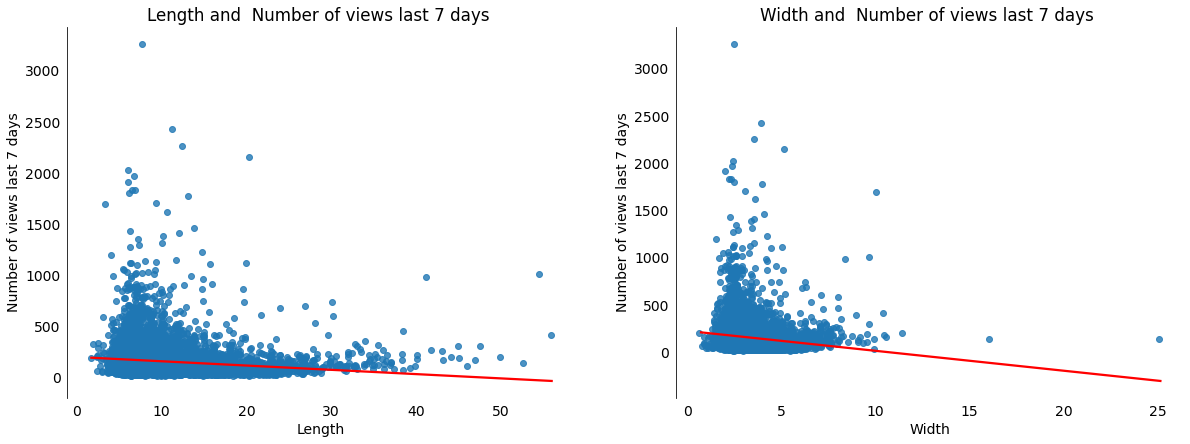

In [48]:

fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Length', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Length and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.regplot(x='Width', y='Number of views last 7 days', data=df_Cleaning, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax2.set_title("Width and  Number of views last 7 days ")

### Save Cleaned Data

In [49]:
import os
os.chdir('/kaggle/working')
df_Cleaning.to_csv('/kaggle/working/Boat_Sales_CleanedData.csv')

## Conclusions

### Key Findings
- The Average View increase when boat type is Wakeboard/Wakesurf , Water ski , Classic, House Boat and Cabin Boat have the highest average views then other.
- the highest average views is Wakeboard/Wakesurf.
- People prefer fun-filled boats and family gatherings (good point).
- The highest average views occur when the material is plastic.
- Each country favours different types of boats, although many of these countries agree on the following: House Boat, Mega Yacht, Wakeboard/Wakesurf, Classic, Offshore Boat.
- in Croatia and Italy , where the demand for the new boats more then the used boats.
- Most of the countries prefer Unleaded engine and Diesel more.
- But the main demand varies between countries as follows:
    - Switzerland has demand on Hybird.
    - Coratia and Spain has demand on gas.
    - Italy has demand on propane.
    - France has demand on Electric.
- the Country has highest average views is Switzerland.
- Average view between the used and the new boat are not too far apar.
- in Switzerland and Germany, where the demand for the used boats are rocketing.
- in Croatia and Italy , where the demand for the new boats more then the used boats.
- All of the countries prefer Boat Type is Plastic Except for France has demand on Aluminium. 
- Boats that are Very Old (built before 2000) have highest average views.
- Boats that are Cheap (less than 44290) have highest average views.

### Recommendations
- Publishing an advertisement in one of the well-known magazines or creating a newsletter that includes a picture of a family gathering and entertainment and at least two types of boats, House boat and Mega Yacht, used boats, and we emphasise that the engine type is Unleaded engine and Diesel, that the boats' materials are plastic, and that the boats are old and cheap.

- Because tastes fluctuate from one country to the next, it is recommended that each advertisement be adapted for each unique country.

- Because Switzerland and Germany have a high number of viewers, they are of importance to us, thus it is advisable to publish an advertising and a separate bulletin for them to clearly express their consumer preferences.

